#Summary


---


1.   In this project we performed k-means clustering and customer segmentation along with DBSCAN.
2.   We also plotted some graphs to get a better overview of the data
3.   Based on words in product description we formed clusters of the products
4.  Number of clusters that are well suited for our data is 5 for k-means
5.  We then formed clusters based on first date and last date when the shopping was done and prices per category




In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himanshuhs4554","key":"9f56ef23900bc54e07d3b5927b2d5a98"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d jacksondivakarr/online-shopping-dataset

Dataset URL: https://www.kaggle.com/datasets/jacksondivakarr/online-shopping-dataset
License(s): Apache 2.0
  0% 0.00/5.15M [00:00<?, ?B/s]
100% 5.15M/5.15M [00:00<00:00, 59.2MB/s]


In [7]:
!unzip online-shopping-dataset.zip

Archive:  online-shopping-dataset.zip
  inflating: file.csv                
  inflating: file.xlsx               


In [8]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [9]:
df=pd.read_csv('file.csv')
df

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52950,52950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gift Cards,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,GC20,20.0
52951,52951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks & Journals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NJ20,20.0
52952,52952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,AND10,10.0
52953,52953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,AND20,20.0


In [10]:
df.shape
df=df.drop('Unnamed: 0',axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  float64
 1   Gender               52924 non-null  object 
 2   Location             52924 non-null  object 
 3   Tenure_Months        52924 non-null  float64
 4   Transaction_ID       52924 non-null  float64
 5   Transaction_Date     52924 non-null  object 
 6   Product_SKU          52924 non-null  object 
 7   Product_Description  52924 non-null  object 
 8   Product_Category     52955 non-null  object 
 9   Quantity             52924 non-null  float64
 10  Avg_Price            52924 non-null  float64
 11  Delivery_Charges     52924 non-null  float64
 12  Coupon_Status        52924 non-null  object 
 13  GST                  52924 non-null  float64
 14  Date                 52924 non-null  object 
 15  Offline_Spend        52924 non-null 

In [12]:
df['Discount_pct'] = df['Discount_pct'].fillna(0)
df['Coupon_Code'] = df['Coupon_Code'].fillna('NOTOFF')

In [13]:
df.isnull().sum()

CustomerID             31
Gender                 31
Location               31
Tenure_Months          31
Transaction_ID         31
Transaction_Date       31
Product_SKU            31
Product_Description    31
Product_Category        0
Quantity               31
Avg_Price              31
Delivery_Charges       31
Coupon_Status          31
GST                    31
Date                   31
Offline_Spend          31
Online_Spend           31
Month                   0
Coupon_Code             0
Discount_pct            0
dtype: int64

In [14]:
df['Location'].unique()

array(['Chicago', 'California', 'New York', 'New Jersey', 'Washington DC',
       nan], dtype=object)

In [15]:
df = df.dropna(subset=['CustomerID'], axis=0)
df

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,3/10/2019,2500.0,1294.22,3,GC30,30.0
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,3/28/2019,2000.0,1066.12,3,GC30,30.0
52921,16085.0,M,California,15.0,39991.0,2019-10-06,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0
52922,16085.0,M,California,15.0,39991.0,2019-10-06,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0


In [16]:
df.isnull().sum()

CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Date                   0
Offline_Spend          0
Online_Spend           0
Month                  0
Coupon_Code            0
Discount_pct           0
dtype: int64

In [17]:
df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52924 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  float64       
 1   Gender               52924 non-null  object        
 2   Location             52924 non-null  object        
 3   Tenure_Months        52924 non-null  float64       
 4   Transaction_ID       52924 non-null  float64       
 5   Transaction_Date     52924 non-null  datetime64[ns]
 6   Product_SKU          52924 non-null  object        
 7   Product_Description  52924 non-null  object        
 8   Product_Category     52924 non-null  object        
 9   Quantity             52924 non-null  float64       
 10  Avg_Price            52924 non-null  float64       
 11  Delivery_Charges     52924 non-null  float64       
 12  Coupon_Status        52924 non-null  object        
 13  GST                  52924 non-null 

In [19]:
df=df.drop('Date',axis=1)
df

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.10,4500.0,2424.50,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,2500.0,1294.22,3,GC30,30.0
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,2000.0,1066.12,3,GC30,30.0
52921,16085.0,M,California,15.0,39991.0,2019-10-06,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,3000.0,2230.76,10,NJ10,10.0
52922,16085.0,M,California,15.0,39991.0,2019-10-06,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,3000.0,2230.76,10,NJ10,10.0


In [20]:
df['Coupon_Status'].unique()

array(['Used', 'Not Used', 'Clicked'], dtype=object)

In [21]:
df=df.drop('Product_SKU',axis=1)
df

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.10,4500.0,2424.50,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,2500.0,1294.22,3,GC30,30.0
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,2000.0,1066.12,3,GC30,30.0
52921,16085.0,M,California,15.0,39991.0,2019-10-06,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,3000.0,2230.76,10,NJ10,10.0
52922,16085.0,M,California,15.0,39991.0,2019-10-06,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,3000.0,2230.76,10,NJ10,10.0


In [22]:
df['Product_Description'].nunique()

404

In [23]:
import plotly.express as px
from plotly.offline import iplot,plot
from plotly.subplots import make_subplots

In [24]:
Category = df['Product_Category'].value_counts().sort_values(ascending=True)
iplot(px.bar(Category,
             color=Category,
             labels={'index':'Category','value':'Count'},
             title='Count of Product Category',
             text_auto=True,
             orientation='v'
))

In [25]:
Category = df['Coupon_Code'].value_counts().sort_values(ascending=True)
iplot(px.bar(Category,
             color=Category,
             labels={'index':'Category','value':'Count'},
             title='Total uses of coupon codes',
             text_auto=True,
             orientation='v'
))

In [26]:
Category = df['Coupon_Status'].value_counts().sort_values(ascending=True)
iplot(px.bar(Category,
             color=Category,
             labels={'index':'Category','value':'Count'},
             title='Coupon status',
             text_auto=True,
             orientation='v'
))

In [27]:
Category = df['Discount_pct'].value_counts().sort_values(ascending=True)
iplot(px.bar(Category,
             color=Category,
             labels={'index':'Category','value':'Count'},
             title='Discount percent',
             text_auto=True,
             orientation='v',
))

In [28]:
Category = df['Location'].value_counts().sort_values(ascending=True)
iplot(px.bar(Category,
             color=Category,
             labels={'index':'Category','value':'Count'},
             title='Locations',
             text_auto=True,
             orientation='v'
))

In [29]:
gender_counts = df['Gender'].value_counts()
fig = px.pie(gender_counts, values=gender_counts.values, names=gender_counts.index, title='Distribution of Males and Females')
fig.show()

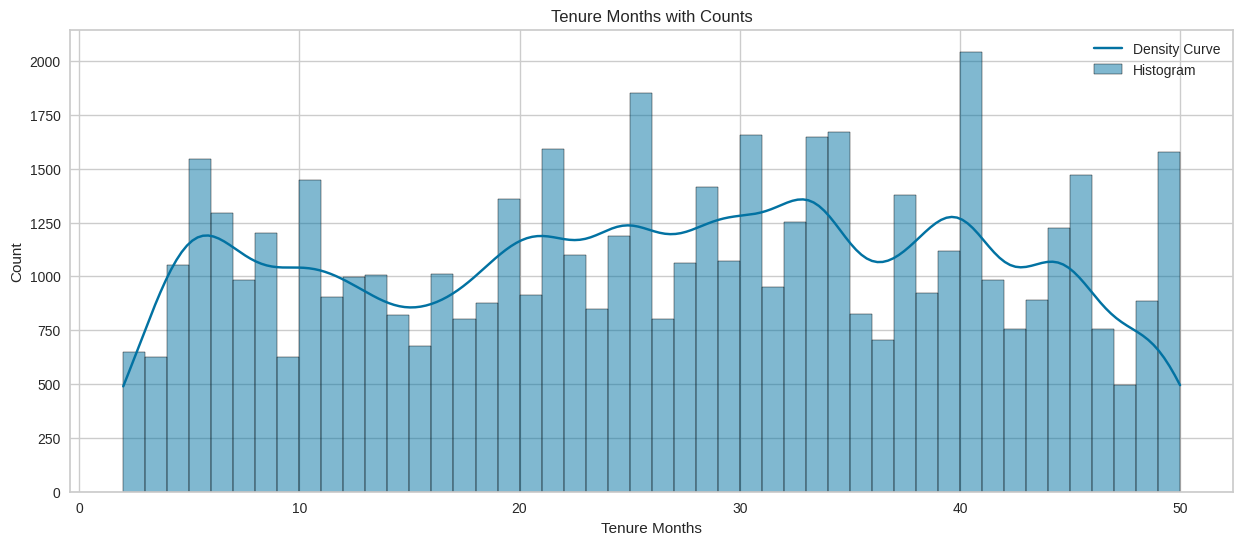

In [30]:
fig , ax  = plt.subplots(figsize=(15,6))
sns.histplot(df['Tenure_Months'],kde=True,bins=48,ax=ax)
ax.set_xlabel('Tenure Months')
ax.set_title("Tenure Months with Counts")
ax.legend(['Density Curve', 'Histogram'])
plt.show()

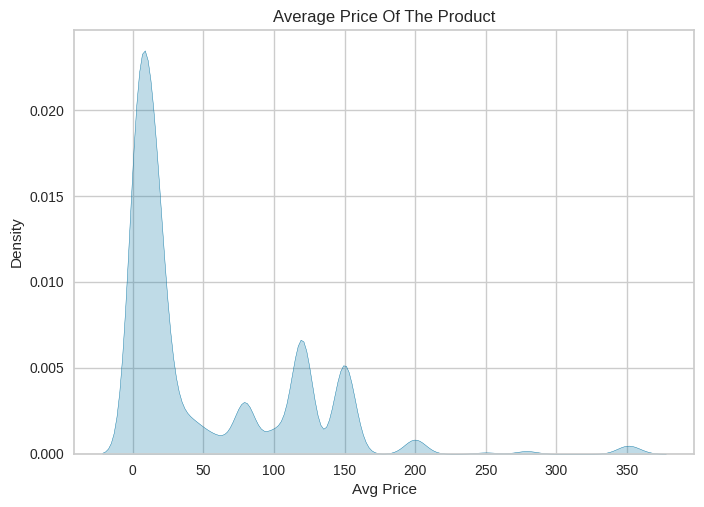

In [31]:
sns.kdeplot(df['Avg_Price'],fill=True)
plt.title('Average Price Of The Product')
plt.xlabel('Avg Price')
plt.show()

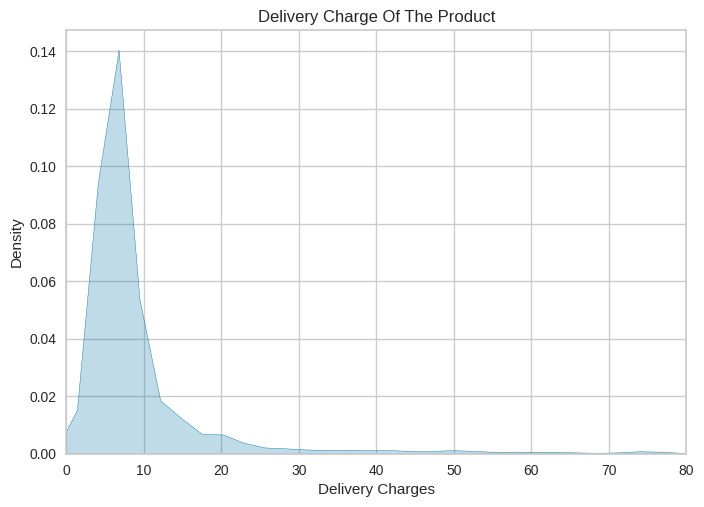

In [32]:
sns.kdeplot(df['Delivery_Charges'],fill=True)
plt.title('Delivery Charge Of The Product')
plt.xlabel('Delivery Charges')
plt.xlim(0, 80)
plt.show()

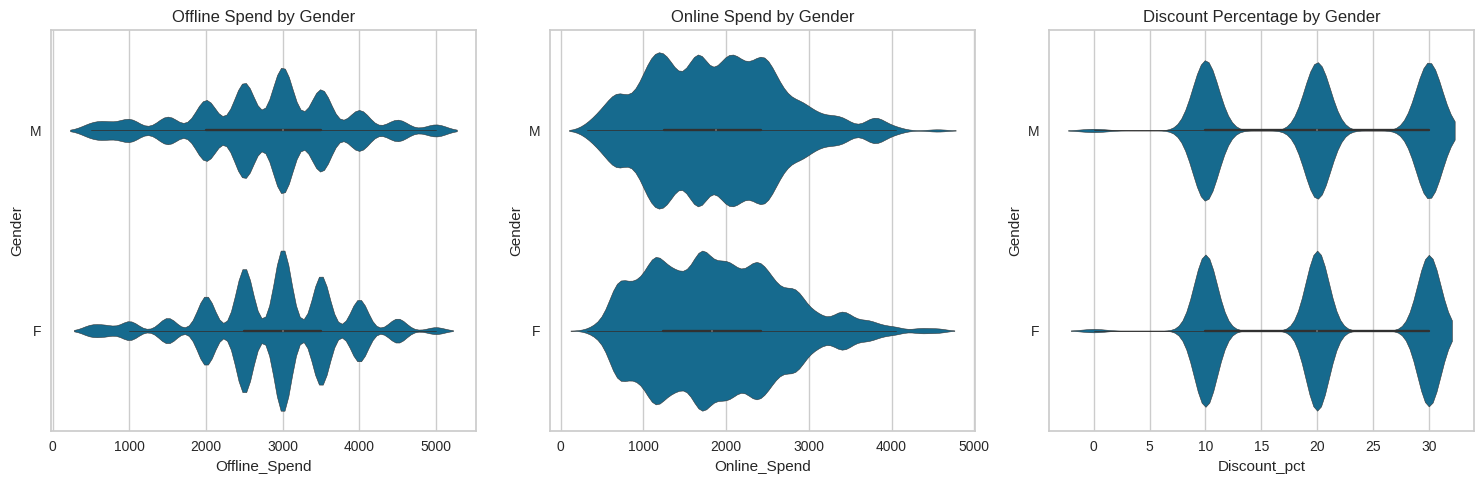

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(x='Offline_Spend', y='Gender', data=df, ax=axes[0])
axes[0].set_title('Offline Spend by Gender')
sns.violinplot(x='Online_Spend', y='Gender', data=df, ax=axes[1])
axes[1].set_title('Online Spend by Gender')
sns.violinplot(x='Discount_pct', y='Gender', data=df, ax=axes[2])
axes[2].set_title('Discount Percentage by Gender')
plt.tight_layout()
plt.show()

In [34]:
def applycharges(x):
  if(x['Coupon_Status']=='Used' or x['Coupon_Status']=='Clicked'):
    return (x['Quantity']*x['Avg_Price']+x['Delivery_Charges']+x['GST'])*(1-(x['Discount_pct']/100))
  else:
    return (x['Quantity']*x['Avg_Price']+x['Delivery_Charges']+x['GST'])
df['total_price']=df.apply(lambda x:applycharges(x),axis=1)
df

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,total_price
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,1,ELEC10,10.0,144.279
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,1,ELEC10,10.0,144.279
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.10,4500.0,2424.50,1,ELEC10,10.0,252.140
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0,79.290
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0,144.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,2500.0,1294.22,3,GC30,30.0,175.035
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,2000.0,1066.12,3,GC30,30.0,17.535
52921,16085.0,M,California,15.0,39991.0,2019-10-06,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,3000.0,2230.76,10,NJ10,10.0,15.165
52922,16085.0,M,California,15.0,39991.0,2019-10-06,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,3000.0,2230.76,10,NJ10,10.0,14.085


<ipython-input-35-e56902e8972d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Heatmap')

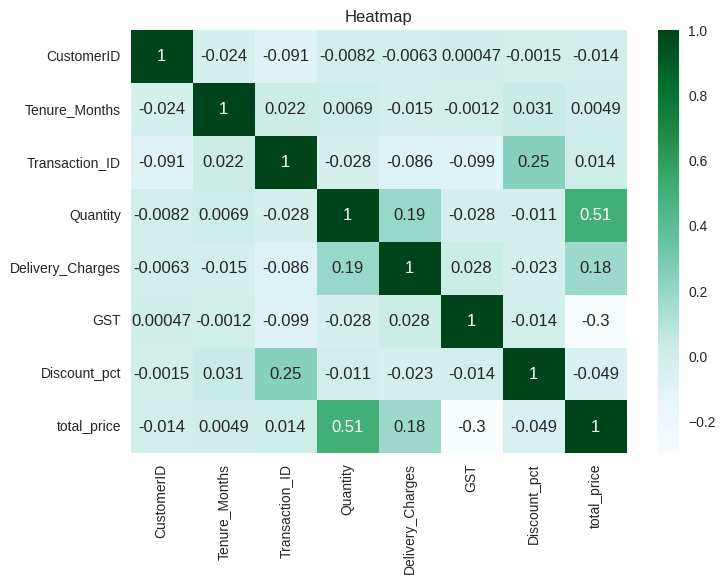

In [35]:
from sklearn.compose import make_column_selector
x=make_column_selector(dtype_include=['number'])
newdf=df[x(df)]
newdf.drop(['Online_Spend','Month','Offline_Spend','Avg_Price'],axis=1,inplace=True)
sns.heatmap(newdf.corr(),annot=True,cmap='BuGn')
plt.title('Heatmap')

In [36]:
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Product_Description'): # Changed default column name to 'Product_Description'
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()
    keywords_select = dict()
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]

        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1

    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]

    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [37]:
df_products = pd.DataFrame(df['Product_Description'].unique()).rename(columns = {0:'Product_Description'})

In [38]:
df_products

,Product_Description
0,Nest Learning Thermostat 3rd Gen-USA - Stainle...
1,Nest Cam Outdoor Security Camera - USA
2,Nest Protect Smoke + CO White Battery Alarm-USA
3,Nest Cam Indoor Security Camera - USA
4,Nest Protect Smoke + CO White Wired Alarm-USA
...,...
399,Compact Journal with Recycled Pages
400,Google Men's Heavyweight Long Sleeve Hero Tee ...
401,Gift Card - $10.00
402,Gift Card - $250.00


In [39]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_products)

Nb of keywords in variable 'Product_Description': 279


In [40]:
from sklearn.metrics import silhouette_score

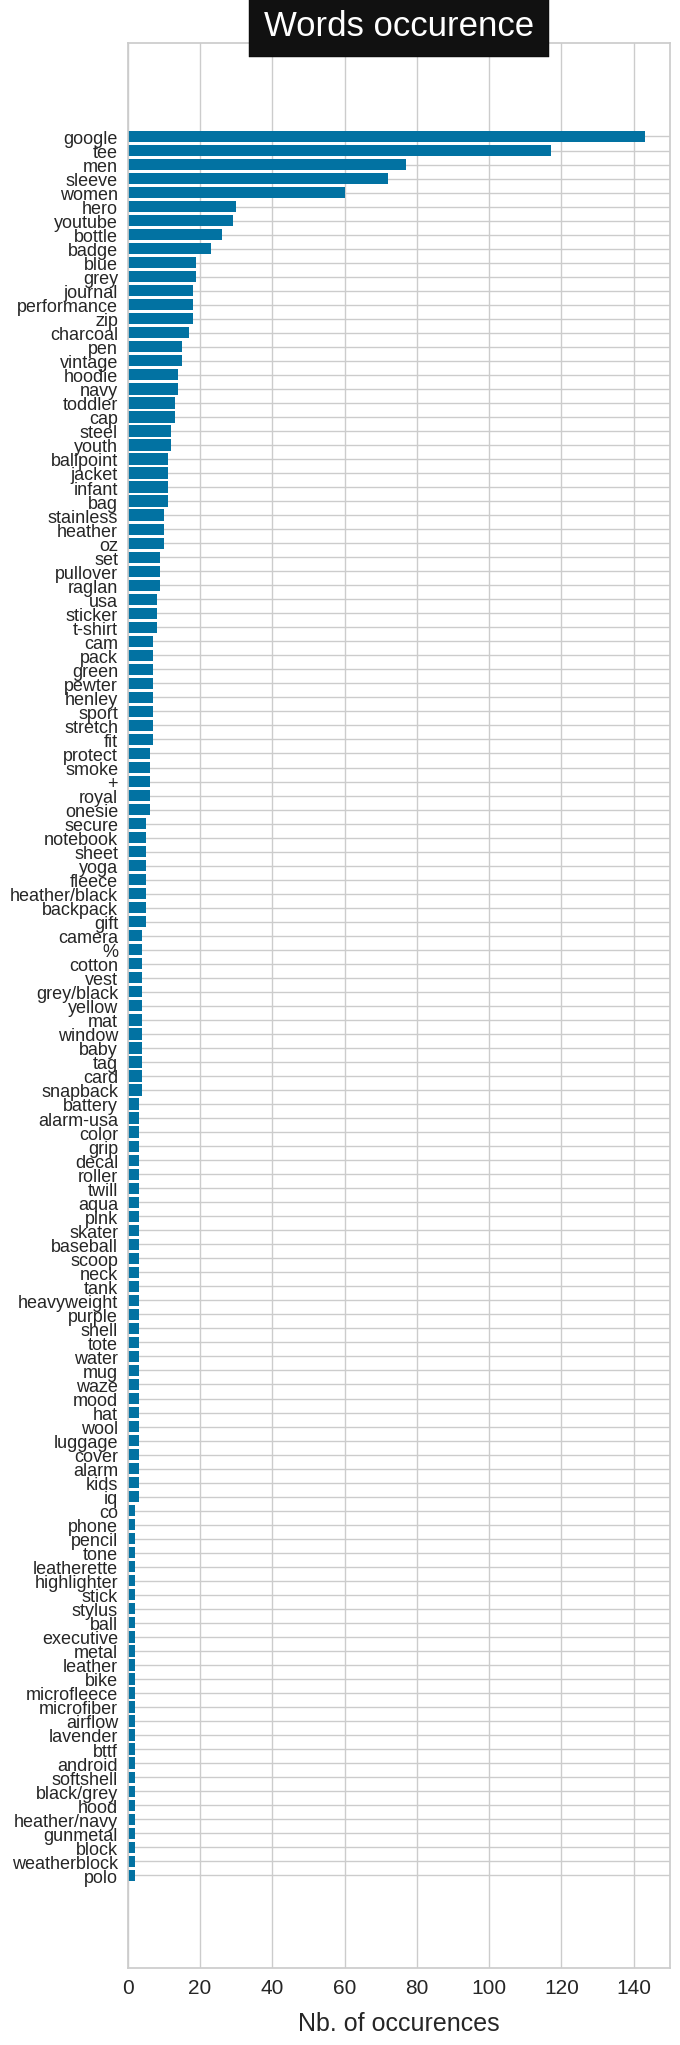

In [41]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)
liste = sorted(list_products, key = lambda x:x[1], reverse = True)
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

In [42]:
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['black', 'pink', 'purple', 'grey', 'color']: continue
    if len(word) < 3 or v < 3: continue
    if ('+' in word) or ('/' in word) or ('%' in word): continue
    list_products.append([word, v])
list_products.sort(key = lambda x:x[1], reverse = True)
print('Final length of products', len(list_products))

Final length of products 88


In [ ]:
list_products

[['google', 143],
 ['tee', 117],
 ['men', 77],
 ['sleeve', 72],
 ['women', 60],
 ['hero', 30],
 ['youtube', 29],
 ['bottle', 26],
 ['badge', 23],
 ['blue', 19],
 ['journal', 18],
 ['performance', 18],
 ['zip', 18],
 ['charcoal', 17],
 ['pen', 15],
 ['vintage', 15],
 ['hoodie', 14],
 ['navy', 14],
 ['toddler', 13],
 ['cap', 13],
 ['steel', 12],
 ['youth', 12],
 ['ballpoint', 11],
 ['jacket', 11],
 ['infant', 11],
 ['bag', 11],
 ['stainless', 10],
 ['heather', 10],
 ['set', 9],
 ['pullover', 9],
 ['raglan', 9],
 ['usa', 8],
 ['sticker', 8],
 ['t-shirt', 8],
 ['cam', 7],
 ['pack', 7],
 ['green', 7],
 ['pewter', 7],
 ['henley', 7],
 ['sport', 7],
 ['stretch', 7],
 ['fit', 7],
 ['protect', 6],
 ['smoke', 6],
 ['royal', 6],
 ['onesie', 6],
 ['secure', 5],
 ['notebook', 5],
 ['sheet', 5],
 ['yoga', 5],
 ['fleece', 5],
 ['backpack', 5],
 ['gift', 5],
 ['camera', 4],
 ['cotton', 4],
 ['vest', 4],
 ['yellow', 4],
 ['mat', 4],
 ['window', 4],
 ['baby', 4],
 ['tag', 4],
 ['card', 4],
 ['snapback',

In [43]:
listed_products = df['Product_Description'].unique()
X = pd.DataFrame()
size=0
for key, occurence in list_products:
    print(key,occurence)
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), listed_products))
    size += occurence
print("size : ",size)

google 143
tee 117
men 77
sleeve 72
women 60
hero 30
youtube 29
bottle 26
badge 23
blue 19
journal 18
performance 18
zip 18
charcoal 17
pen 15
vintage 15
hoodie 14
navy 14
toddler 13
cap 13
steel 12
youth 12
ballpoint 11
jacket 11
infant 11
bag 11
stainless 10
heather 10
set 9
pullover 9
raglan 9
usa 8
sticker 8
t-shirt 8
cam 7
pack 7
green 7
pewter 7
henley 7
sport 7
stretch 7
fit 7
protect 6
smoke 6
royal 6
onesie 6
secure 5
notebook 5
sheet 5
yoga 5
fleece 5
backpack 5
gift 5
camera 4
cotton 4
vest 4
yellow 4
mat 4
window 4
baby 4
tag 4
card 4
snapback 4
battery 3
alarm-usa 3
grip 3
decal 3
roller 3
twill 3
aqua 3
skater 3
baseball 3
scoop 3
neck 3
tank 3
heavyweight 3
shell 3
tote 3
water 3
mug 3
waze 3
mood 3
hat 3
wool 3
luggage 3
cover 3
alarm 3
kids 3
size :  1120


In [44]:
df['total_price'].describe()

count    52924.000000
mean        82.433995
std        144.044011
min          3.870000
25%         15.916500
50%         35.705000
75%        112.590000
max       8551.395000
Name: total_price, dtype: float64

In [45]:
threshold = df['total_price'].quantile([0.16, 0.33, 0.50, 0.67, 0.83,0.99])
print(threshold)

0.16     12.22008
0.33     19.06200
0.50     35.70500
0.67     88.42722
0.83    140.04000
0.99    479.37041
Name: total_price, dtype: float64


In [46]:
label_col = []
for i, val in enumerate(threshold.values):
    if i == len(threshold.values)-1:
        col = '.>{}'.format(val)
    else:
        col = '{}<.<{}'.format(val,threshold.values[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(listed_products):
    prix = df[ df['Product_Description'] == prod]['total_price'].mean()
    j = 0
    while j < len(threshold) and prix > threshold.values[j]:
        j+=1
    if j > 0:
        X.loc[i, label_col[j-1]] = 1

In [47]:
pivot_data = []

for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold.iloc[i])
    else:
        col = '{}<.<{}'.format(threshold.iloc[i],threshold.iloc[i+1])
    count = X.loc[:, col].sum()
    if i == len(threshold)-1:
        col = 'greater than {}'.format(threshold.iloc[i])
    else:
        col = ' from {} to {}'.format(threshold.iloc[i],threshold.iloc[i+1])
    pivot_data.append({'Price Range': col, 'Number of Products': count})
df_pivot = pd.DataFrame(pivot_data)
df_pivot = df_pivot.set_index('Price Range')
print(df_pivot)

                                    Number of Products
Price Range                                           
 from 12.220080000000001 to 19.062                  41
 from 19.062 to 35.705                             129
 from 35.705 to 88.42722000000015                  160
 from 88.42722000000015 to 140.04                   37
 from 140.04 to 479.3704099999983                   27
greater than 479.3704099999983                       3


In [48]:
X

,google,tee,men,sleeve,women,hero,youtube,bottle,badge,blue,...,luggage,cover,alarm,kids,12.220080000000001<.<19.062,19.062<.<35.705,35.705<.<88.42722000000015,88.42722000000015<.<140.04,140.04<.<479.3704099999983,.>479.3704099999983
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
from sklearn.metrics import calinski_harabasz_score
matrix = X.to_numpy()
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    ch_score = calinski_harabasz_score(X, clusters)
    print("Calinski-Harabasz Index:", ch_score)
    silhouette_avg = silhouette_score(X, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

Calinski-Harabasz Index: 474.67335309564356
For n_clusters = 3 The average silhouette_score is : 0.7831124784860071
Calinski-Harabasz Index: 646.4484302185591
For n_clusters = 4 The average silhouette_score is : 0.8703858180548533
Calinski-Harabasz Index: 1238.1530532455968
For n_clusters = 5 The average silhouette_score is : 0.9289320034421764
Calinski-Harabasz Index: 1685.5146236816527
For n_clusters = 6 The average silhouette_score is : 0.9452916604807767
Calinski-Harabasz Index: 2588.0565274738
For n_clusters = 7 The average silhouette_score is : 0.9686244386024491
Calinski-Harabasz Index: 5386.251972273114
For n_clusters = 8 The average silhouette_score is : 0.9861885478134181
Calinski-Harabasz Index: 14754.938481396963
For n_clusters = 9 The average silhouette_score is : 0.9957744881653798


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

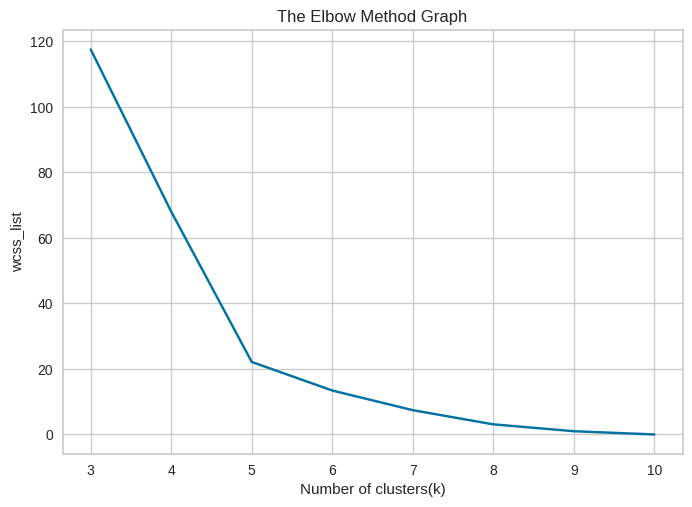

In [50]:
wcss_list = []
for i in range(3, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(3, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [51]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.9289320034421764


In [52]:
pd.Series(clusters).value_counts()

0    160
1    129
4     41
2     37
3     37
Name: count, dtype: int64

In [53]:
import matplotlib.cm as cm
import sklearn.metrics as metrics

In [54]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    plt.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        y_lower = y_upper + 10

<ipython-input-54-b2395a08a2c3>:16: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



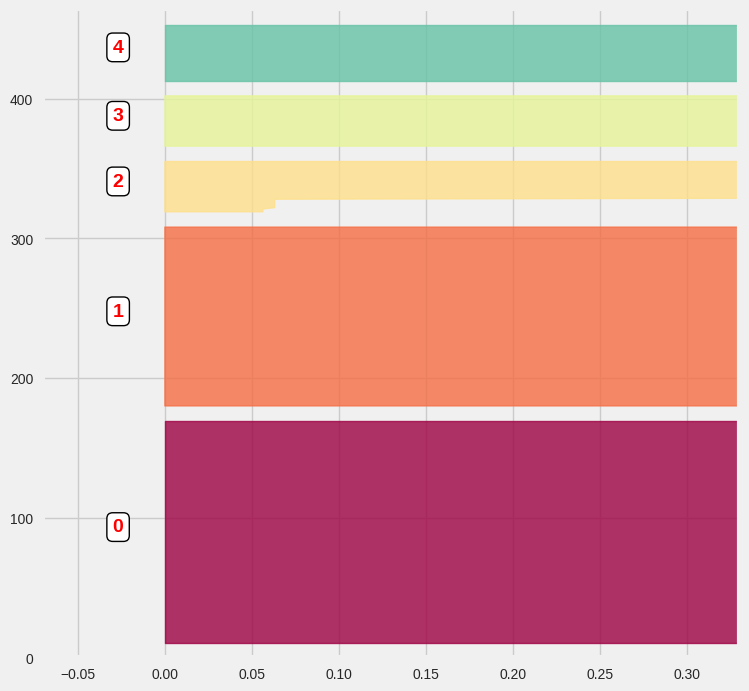

In [55]:
import sklearn.metrics as metrics
sample_silhouette_values = metrics.silhouette_samples(matrix, clusters)
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

In [56]:
listed = pd.DataFrame(listed_products)
list_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(5)]

for i in range(n_clusters):
    liste_cluster = listed.loc[clusters == i]
    for word in list_words:
        occurence[i][word] = sum(liste_cluster.iloc[:, 0].str.lower().str.contains(word.lower()))

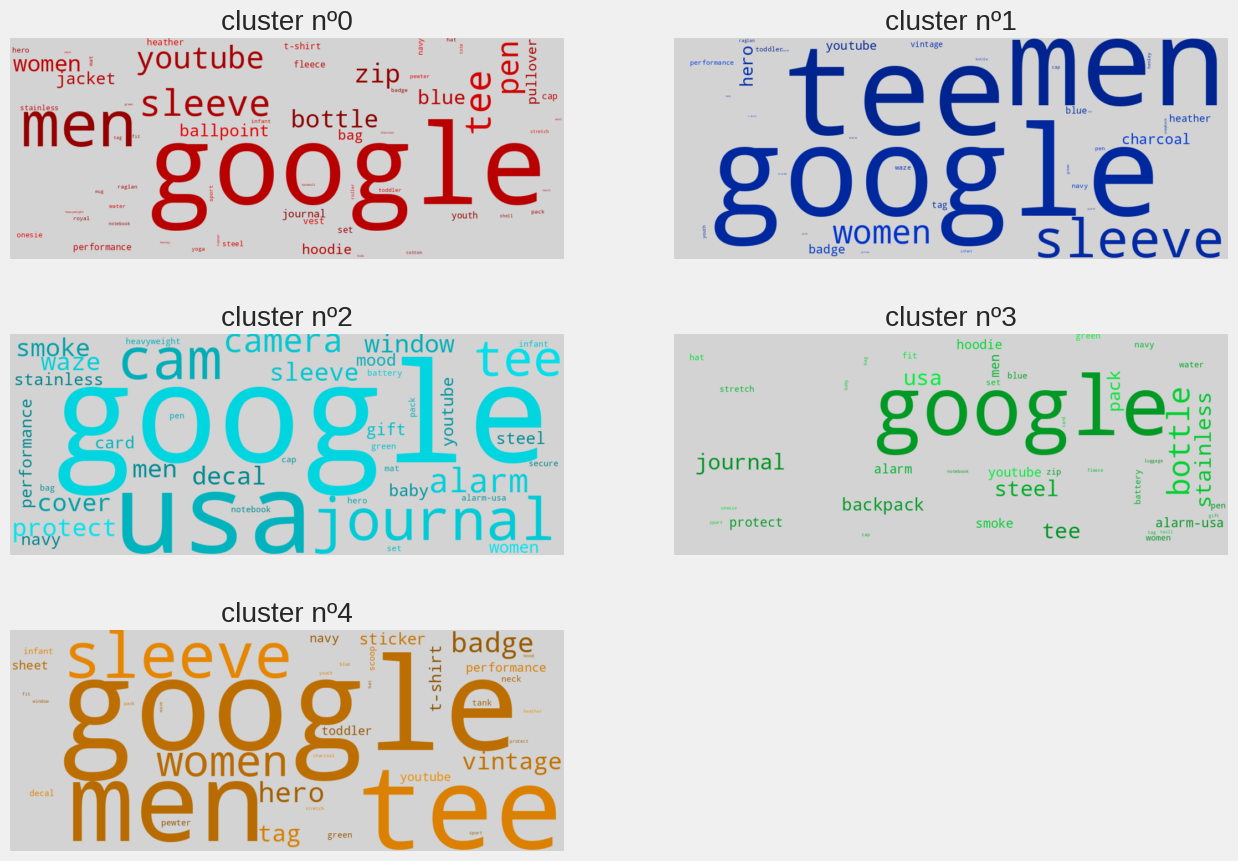

In [57]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey',
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(increment-1))
fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i]
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)

In [58]:
corresp = dict()
for key, val in zip (listed_products, clusters):
    corresp[key] = val
df['category_of_product'] = df.loc[:, 'Product_Description'].map(corresp)

In [59]:
def func(x,i):
  if(x['category_of_product']==i):
    return x['total_price']
  else:
    return 0
for i in range(0,5):
  df[f'cat_{i}']=df.apply(lambda x:func(x,i),axis=1)

In [60]:
df

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,...,Month,Coupon_Code,Discount_pct,total_price,category_of_product,cat_0,cat_1,cat_2,cat_3,cat_4
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,...,1,ELEC10,10.0,144.279,2,0.000,0.000,144.279,0.000,0.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,...,1,ELEC10,10.0,144.279,2,0.000,0.000,144.279,0.000,0.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,...,1,ELEC10,10.0,252.140,2,0.000,0.000,252.140,0.000,0.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,...,1,ELEC10,10.0,79.290,3,0.000,0.000,0.000,79.290,0.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,...,1,ELEC10,10.0,144.279,2,0.000,0.000,144.279,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,Gift Card - $250.00,Gift Cards,1.0,250.00,...,3,GC30,30.0,175.035,2,0.000,0.000,175.035,0.000,0.0
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,Gift Card - $25.00,Gift Cards,1.0,25.00,...,3,GC30,30.0,17.535,1,0.000,17.535,0.000,0.000,0.0
52921,16085.0,M,California,15.0,39991.0,2019-10-06,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,...,10,NJ10,10.0,15.165,0,15.165,0.000,0.000,0.000,0.0
52922,16085.0,M,California,15.0,39991.0,2019-10-06,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,...,10,NJ10,10.0,14.085,3,0.000,0.000,0.000,14.085,0.0


In [89]:
temp = df.groupby(by=['CustomerID','Transaction_ID'], as_index=False)['total_price'].sum()

In [90]:
temp

,CustomerID,Transaction_ID,total_price
0,12346.0,38223.0,126.889
1,12347.0,23979.0,29.400
2,12347.0,23980.0,390.040
3,12347.0,23981.0,268.908
4,12347.0,23984.0,7265.578
...,...,...,...
26626,18283.0,40286.0,94.545
26627,18283.0,40288.0,52.454
26628,18283.0,40289.0,33.606
26629,18283.0,40290.0,55.206


In [112]:
basket_price1 = temp.rename(columns = {'total_price':'Basket Price'})

In [113]:
for i in range(5):
    col = 'cat_{}'.format(i)
    temp = df.groupby(by=['CustomerID','Transaction_ID'], as_index=False)[col].sum()
    basket_price1.loc[:, col] = temp[col]

In [116]:
transaction_date_map = df.drop_duplicates(subset=['Transaction_ID']).set_index('Transaction_ID')['Transaction_Date']
basket_price1['Transaction_Date'] = basket_price1['Transaction_ID'].map(transaction_date_map)
basket_price1

,CustomerID,Transaction_ID,cat_4,cat_0,cat_1,cat_2,cat_3,Transaction_Date
0,12346.0,38223.0,0.000,60.270,66.619,0.000,0.000,2019-09-15
1,12347.0,23979.0,0.000,12.250,0.000,17.150,0.000,2019-03-24
2,12347.0,23980.0,0.000,0.000,0.000,390.040,0.000,2019-03-24
3,12347.0,23981.0,0.000,121.586,147.322,0.000,0.000,2019-03-24
4,12347.0,23984.0,0.000,0.000,0.000,7265.578,0.000,2019-03-24
...,...,...,...,...,...,...,...,...
26626,18283.0,40286.0,0.000,0.000,0.000,0.000,94.545,2019-10-10
26627,18283.0,40288.0,0.000,18.140,34.314,0.000,0.000,2019-10-10
26628,18283.0,40289.0,0.000,13.923,19.683,0.000,0.000,2019-10-10
26629,18283.0,40290.0,0.000,0.000,55.206,0.000,0.000,2019-10-10


In [125]:
basket_price1

,CustomerID,Transaction_ID,cat_4,cat_0,cat_1,cat_2,cat_3,Transaction_Date
0,12346.0,38223.0,0.000,60.270,66.619,0.000,0.0,2019-09-15
1,12347.0,23979.0,0.000,12.250,0.000,17.150,0.0,2019-03-24
2,12347.0,23980.0,0.000,0.000,0.000,390.040,0.0,2019-03-24
3,12347.0,23981.0,0.000,121.586,147.322,0.000,0.0,2019-03-24
4,12347.0,23984.0,0.000,0.000,0.000,7265.578,0.0,2019-03-24
...,...,...,...,...,...,...,...,...
26595,18283.0,34048.0,0.000,0.000,27.693,0.000,0.0,2019-07-29
26596,18283.0,34049.0,0.000,0.000,0.000,112.590,0.0,2019-07-29
26597,18283.0,34050.0,19.773,0.000,64.350,0.000,0.0,2019-07-29
26598,18283.0,34051.0,0.000,99.030,34.155,0.000,0.0,2019-07-29


In [126]:
basket_price1['Basket Price']=basket_price1.apply(lambda x:x['cat_4']+x['cat_1']+x['cat_0']+x['cat_2']+x['cat_3'],axis=1)
basket_price1

,CustomerID,Transaction_ID,cat_4,cat_0,cat_1,cat_2,cat_3,Transaction_Date,basket_price
0,12346.0,38223.0,0.000,60.270,66.619,0.000,0.0,2019-09-15,126.889
1,12347.0,23979.0,0.000,12.250,0.000,17.150,0.0,2019-03-24,29.400
2,12347.0,23980.0,0.000,0.000,0.000,390.040,0.0,2019-03-24,390.040
3,12347.0,23981.0,0.000,121.586,147.322,0.000,0.0,2019-03-24,268.908
4,12347.0,23984.0,0.000,0.000,0.000,7265.578,0.0,2019-03-24,7265.578
...,...,...,...,...,...,...,...,...,...
26595,18283.0,34048.0,0.000,0.000,27.693,0.000,0.0,2019-07-29,27.693
26596,18283.0,34049.0,0.000,0.000,0.000,112.590,0.0,2019-07-29,112.590
26597,18283.0,34050.0,19.773,0.000,64.350,0.000,0.0,2019-07-29,84.123
26598,18283.0,34051.0,0.000,99.030,34.155,0.000,0.0,2019-07-29,133.185


In [120]:
set_train = basket_price1[basket_price1['Transaction_Date'].dt.date < datetime.date(2019,10,1)]
set_test         = basket_price1[basket_price1['Transaction_Date'].dt.date >= datetime.date(2019,10,1)]
basket_price1 = set_train.copy(deep = True)

In [130]:
transactions_per_user=basket_price1.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'cat_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['cat_0'].sum()
transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,cat_0,cat_1,cat_2,cat_3,cat_4
0,12346.0,1,126.889,126.889,126.889000,126.889,3847.354775,4252.645225,0.000000,0.000000,0.000000
1,12347.0,13,29.400,7265.578,739.881077,9618.454,58.547132,60.008272,1970.225568,47.780444,5.466388
2,12348.0,4,18.319,299.026,155.719500,622.878,5356.246328,852.668901,246.891044,35.125659,174.203616
3,12356.0,13,11.949,431.716,122.607462,1593.897,467.312066,838.163821,79.896944,156.790809,225.732779
4,12359.0,3,15.472,453.940,197.830667,593.492,260.694331,5518.610529,20.906769,0.000000,19262.946763


In [132]:
last_date = basket_price['Transaction_Date'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['Transaction_Date'].min())
last_purchase      = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['Transaction_Date'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['Transaction_Date']
transactions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['Transaction_Date']

transactions_per_user[:5]

,CustomerID,count,min,max,mean,sum,cat_0,cat_1,cat_2,cat_3,cat_4,LastPurchase,FirstPurchase
0,12346.0,1,126.889,126.889,126.889000,126.889,3847.354775,4252.645225,0.000000,0.000000,0.000000,107,107
1,12347.0,13,29.400,7265.578,739.881077,9618.454,58.547132,60.008272,1970.225568,47.780444,5.466388,59,282
2,12348.0,4,18.319,299.026,155.719500,622.878,5356.246328,852.668901,246.891044,35.125659,174.203616,73,192
3,12356.0,13,11.949,431.716,122.607462,1593.897,467.312066,838.163821,79.896944,156.790809,225.732779,17,17
4,12359.0,3,15.472,453.940,197.830667,593.492,260.694331,5518.610529,20.906769,0.000000,19262.946763,107,107


In [134]:
list_cols = ['count','min','max','mean','cat_0','cat_1','cat_2','cat_3','cat_4']
selected_customers = transactions_per_user.copy(deep = True)
matrix = selected_customers[list_cols].to_numpy()

In [136]:
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [  15.94449047   34.45401906  602.01788732  152.67380676 1907.78425762
 1041.31734544  497.57406913  359.55455957  299.1402509 ]


In [137]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

<ipython-input-139-6b2827298737>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



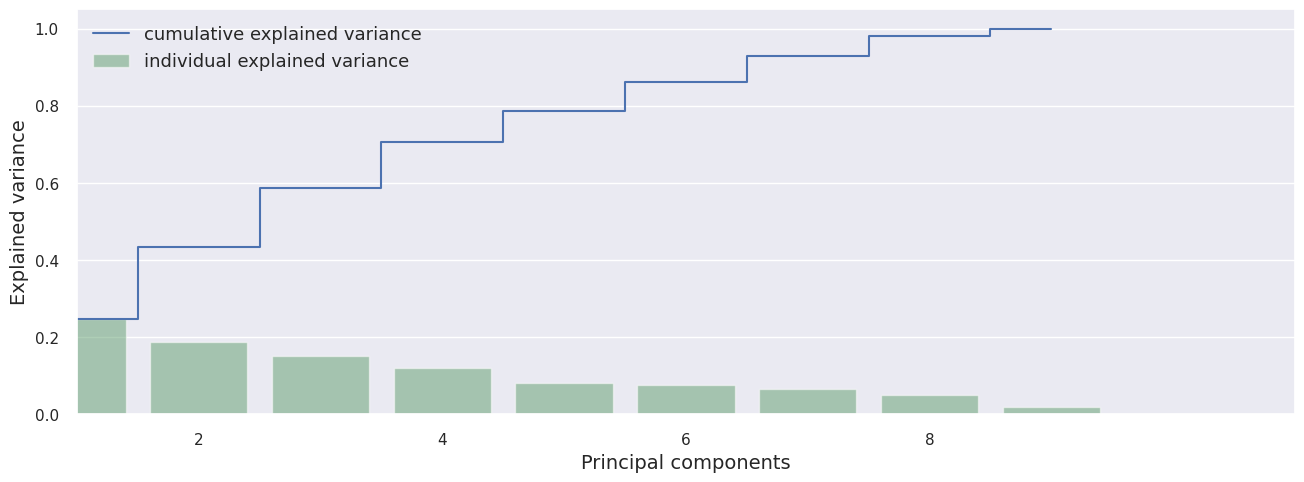

In [139]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(x=np.arange(1,matrix.shape[1]+1),y=pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13);

In [153]:
n_clusters=3
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
print(clusters_clients)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('silhouette score: {:<.3f}'.format(silhouette_avg))

[0 1 0 ... 0 0 0]
silhouette score: 0.807


In [168]:
pd.DataFrame(pd.Series(clusters_clients).value_counts())

,count
0,1181
1,21
2,5


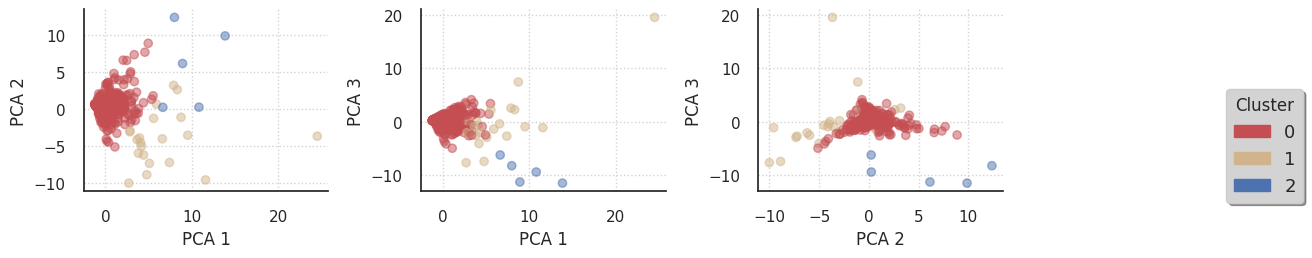

In [171]:
pca = PCA(n_components=3)
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(3):
    for iy in range(ix+1, 3):
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5)
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        if increment == 12: break
    if increment == 12: break
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9),
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()

<ipython-input-54-b2395a08a2c3>:16: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



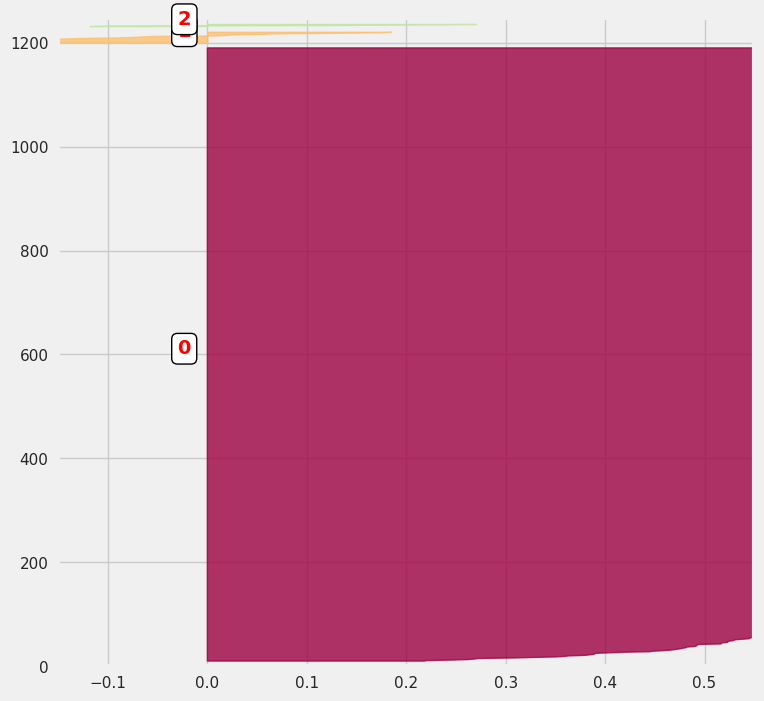

In [173]:
sample_silhouette_values = metrics.silhouette_samples(scaled_matrix, clusters_clients)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

In [174]:
selected_customers.loc[:, 'cluster'] = clusters_clients

In [175]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
merged_df.drop('CustomerID', axis = 1, inplace = True)
print('number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('sum')

number of customers: 1207


In [180]:
list_index = []
for i in range(5):
    column = 'cat_{}'.format(i)
    list_index.append(merged_df[merged_df[column] > 45].index.values[0])
#___________________________________
list_index_reordered = list_index
list_index_reordered += [ s for s in merged_df.index if s not in list_index]
#___________________________________________________________
merged_df = merged_df.reindex(index = list_index_reordered)
merged_df = merged_df.reset_index(drop = False)
display(merged_df[['cluster', 'count', 'min', 'max', 'mean', 'sum', 'cat_0',
                   'cat_1', 'cat_2', 'cat_3', 'cat_4', 'size']])

,cluster,count,min,max,mean,sum,cat_0,cat_1,cat_2,cat_3,cat_4,size
0,0.0,15.510584,31.699884,484.699385,141.786747,2323.244721,1535.493527,980.640615,387.329769,244.919178,297.863220,1181
0,0.0,15.510584,31.699884,484.699385,141.786747,2323.244721,1535.493527,980.640615,387.329769,244.919178,297.863220,1181
0,0.0,15.510584,31.699884,484.699385,141.786747,2323.244721,1535.493527,980.640615,387.329769,244.919178,297.863220,1181
0,0.0,15.510584,31.699884,484.699385,141.786747,2323.244721,1535.493527,980.640615,387.329769,244.919178,297.863220,1181
0,0.0,15.510584,31.699884,484.699385,141.786747,2323.244721,1535.493527,980.640615,387.329769,244.919178,297.863220,1181
1,0.0,15.510584,31.699884,484.699385,141.786747,2323.244721,1535.493527,980.640615,387.329769,244.919178,297.863220,1181
2,0.0,15.510584,31.699884,484.699385,141.786747,2323.244721,1535.493527,980.640615,387.329769,244.919178,297.863220,1181
3,0.0,15.510584,31.699884,484.699385,141.786747,2323.244721,1535.493527,980.640615,387.329769,244.919178,297.863220,1181
4,0.0,15.510584,31.699884,484.699385,141.786747,2323.244721,1535.493527,980.640615,387.329769,244.919178,297.863220,1181
5,0.0,15.510584,31.699884,484.699385,141.786747,2323.244721,1535.493527,980.640615,387.329769,244.919178,297.863220,1181


In [182]:
from sklearn.cluster import DBSCAN
import sklearn.utils

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52924 entries, 0 to 52923
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  float64       
 1   Gender               52924 non-null  object        
 2   Location             52924 non-null  object        
 3   Tenure_Months        52924 non-null  float64       
 4   Transaction_ID       52924 non-null  float64       
 5   Transaction_Date     52924 non-null  datetime64[ns]
 6   Product_Description  52924 non-null  object        
 7   Product_Category     52924 non-null  object        
 8   Quantity             52924 non-null  float64       
 9   Avg_Price            52924 non-null  float64       
 10  Delivery_Charges     52924 non-null  float64       
 11  Coupon_Status        52924 non-null  object        
 12  GST                  52924 non-null  float64       
 13  Offline_Spend        52924 non-null 

In [191]:
Clus_dataSet = df[['total_price','category_of_product']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
db = DBSCAN(eps=0.4, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df['Clus_Db']=labels
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
print(df[['total_price','category_of_product']].head())
print("number of labels: ", set(labels))

   total_price  category_of_product
0      144.279                    2
1      144.279                    2
2      252.140                    2
3       79.290                    3
4      144.279                    2
number of labels:  {0, 1, 2, 3, 4, 5, -1}


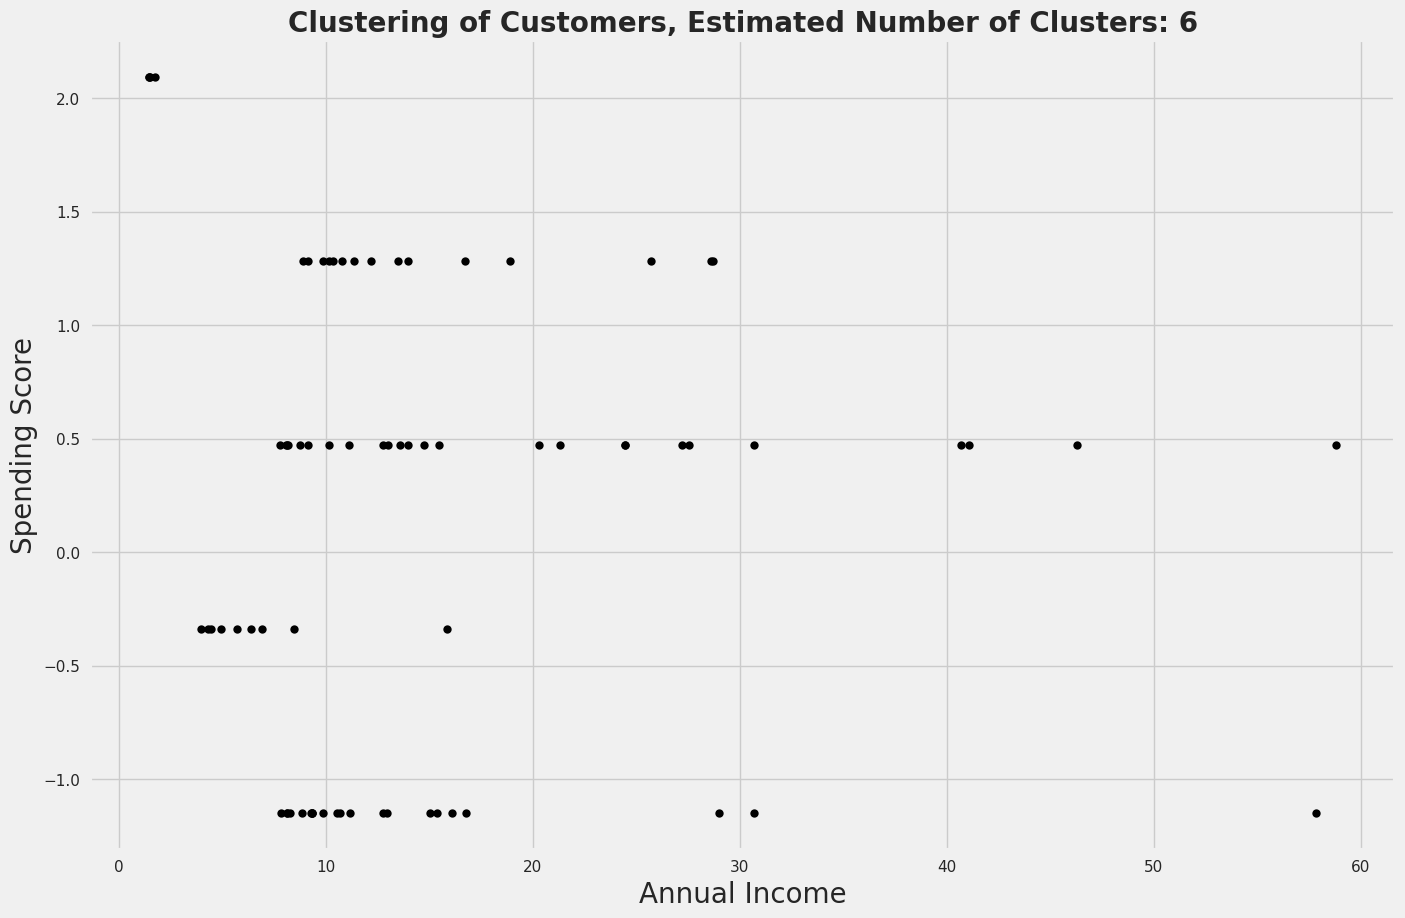

number of noise(s):  75


In [196]:
plt.figure(figsize=(15,10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:

        # Black used for noise.
        col = [0, 0, 0, 1]
class_member_mask = (labels == k)
xy = Clus_dataSet[class_member_mask & core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Clustering of Customers, Estimated Number of Clusters: %d' % realClusterNum, fontweight='bold',fontsize=20)
plt.xlabel('Annual Income',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend(fontsize=20)
plt.show()
n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)

In [199]:
for clust_number in set(labels):
    clust_set = df[df.Clus_Db == clust_number]
    if clust_number != -1:
        print ("Cluster "+str(clust_number)+', average total price: '+ str(round(np.mean(clust_set.total_price)))+\
               ', product description '+ str(round(np.mean(clust_set['category_of_product'])))+\
               ', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, average total price: 164, product description 2, Count: 15312
Cluster 1, average total price: 106, product description 3, Count: 4408
Cluster 2, average total price: 26, product description 1, Count: 12841
Cluster 3, average total price: 50, product description 0, Count: 15740
Cluster 4, average total price: 16, product description 4, Count: 4518
Cluster 5, average total price: 974, product description 3, Count: 29
